In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
dane=pd.read_csv('loans.csv', sep=';', decimal = ',')

In [2]:
dane

,Debt_to_Income_Ratio,FICO_Score,Request_Amount,Interest,Approval
0,0.00,397,1000,450,0
1,0.00,403,500,225,0
2,0.00,408,1000,450,0
3,0.00,408,2000,900,0
4,0.00,411,5000,2250,0
...,...,...,...,...,...
150297,0.38,709,19000,8550,1
150298,0.38,722,17000,7650,1
150299,0.38,747,11000,4950,1
150300,0.39,679,10000,4500,1


In [3]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150302 entries, 0 to 150301
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Debt_to_Income_Ratio  150302 non-null  float64
 1   FICO_Score            150302 non-null  int64  
 2   Request_Amount        150302 non-null  int64  
 3   Interest              150302 non-null  int64  
 4   Approval              150302 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 5.7 MB


In [4]:
numery_indeksow=303890

In [5]:
X = dane.iloc[:,:-1]
y = dane['Approval']

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=numery_indeksow, stratify = y)

In [7]:
len(X_train), len(X_test)
procent=(len(X_test) / len(dane)) * 100
print(procent)

30.00026613085654


In [8]:
suma=len(X_train)+len(X_test)
print(len(dane),suma)

150302 150302


In [9]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.500566
0    0.499434
Name: Approval, dtype: float64
1    0.500566
0    0.499434
Name: Approval, dtype: float64


In [10]:
dane.corr()

,Debt_to_Income_Ratio,FICO_Score,Request_Amount,Interest,Approval
Debt_to_Income_Ratio,1.000000,-0.070586,0.129207,0.129207,-0.267921
FICO_Score,-0.070586,1.000000,0.153920,0.153920,0.544305
Request_Amount,0.129207,0.153920,1.000000,1.000000,-0.045903
Interest,0.129207,0.153920,1.000000,1.000000,-0.045903
Approval,-0.267921,0.544305,-0.045903,-0.045903,1.000000


In [11]:
dane.corr()['Approval'].sort_values(ascending = False)

Approval                1.000000
FICO_Score              0.544305
Request_Amount         -0.045903
Interest               -0.045903
Debt_to_Income_Ratio   -0.267921
Name: Approval, dtype: float64

<AxesSubplot:xlabel='Interest', ylabel='Density'>

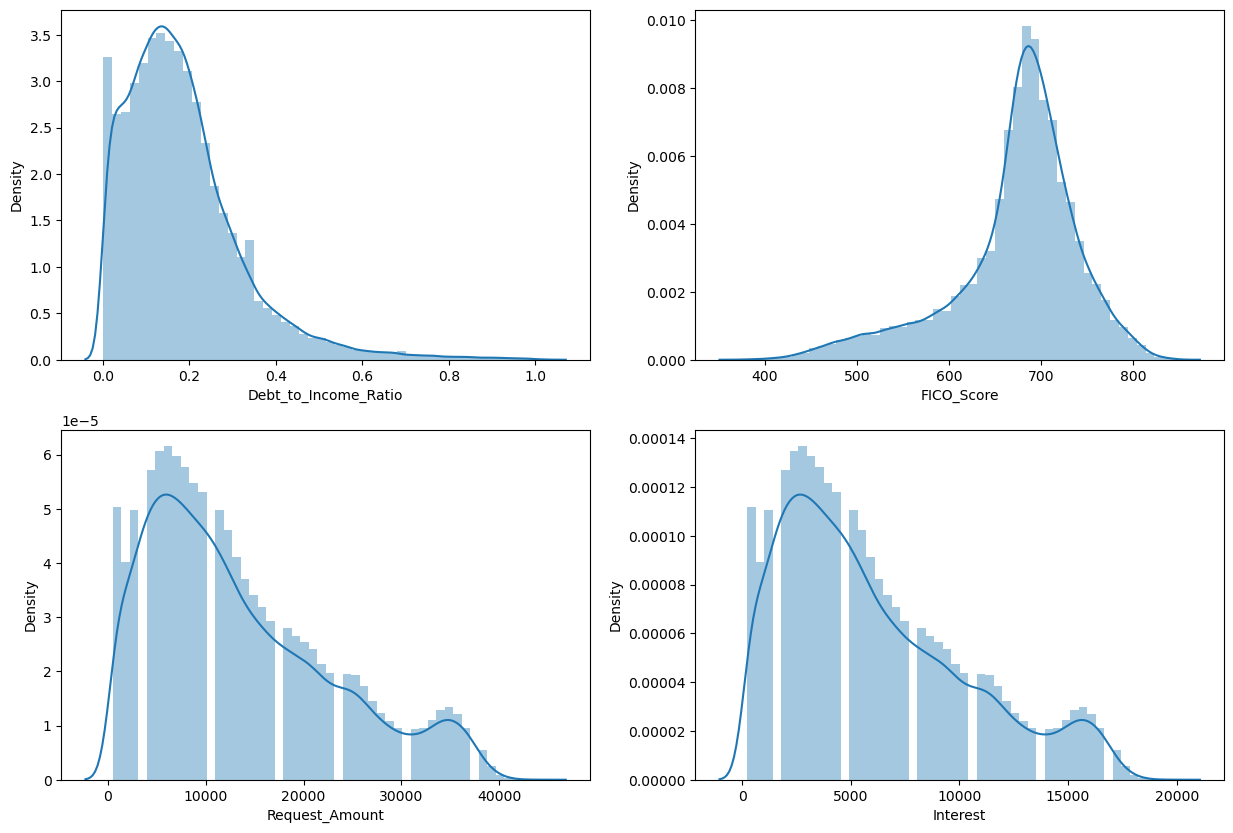

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
sns.distplot(X_train['Debt_to_Income_Ratio'], ax = ax[0, 0])
sns.distplot(X_train['FICO_Score'], ax = ax[0, 1])
sns.distplot(X_train['Request_Amount'], ax = ax[1, 0])
sns.distplot(X_train['Interest'], ax = ax[1, 1])

<AxesSubplot:>

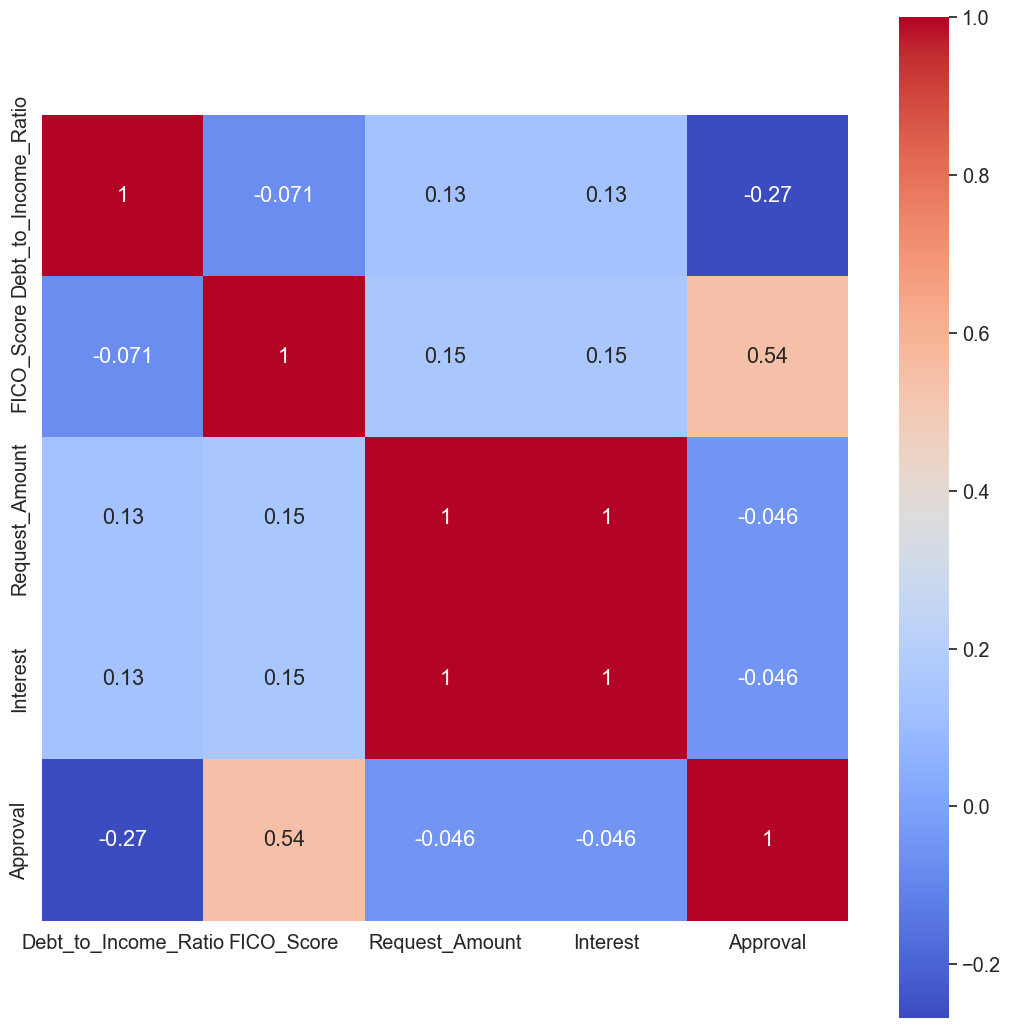

In [13]:
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.3)
sns.heatmap(dane.corr(), annot=True, square=True, cmap='coolwarm')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
scaler.fit(X_test)

MinMaxScaler(feature_range=(-1, 1))

In [15]:
X_train_transformed = scaler.transform(X_train)
X_train_transformed

array([[-0.82524272,  0.25301205, -0.74117647, -0.74117647],
       [ 0.14563107, -0.33333333, -0.64705882, -0.64705882],
       [-0.66990291,  0.23694779, -0.74117647, -0.74117647],
       ...,
       [-0.98058252,  0.23694779, -0.83529412, -0.83529412],
       [-0.86407767,  0.35742972, -0.55294118, -0.55294118],
       [-0.68932039,  0.14859438, -0.31764706, -0.31764706]])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_jobs = 1)
knn5.fit(X_train_transformed, y_train)
y_train_pred = knn5.predict(X_train_transformed)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_train, y_train_pred)

0.8752887055536018

In [18]:
X_test_transformed = scaler.transform(X_test)
X_test_transformed

array([[-0.39805825,  0.33333333,  0.01176471,  0.01176471],
       [-0.16504854,  0.02811245, -0.12941176, -0.12941176],
       [ 0.16504854,  0.25702811,  0.24705882,  0.24705882],
       ...,
       [-0.30097087, -0.14859438, -0.55294118, -0.55294118],
       [-0.65048544,  0.22088353, -0.17647059, -0.17647059],
       [-0.72815534,  0.1124498 , -0.78823529, -0.78823529]])

In [19]:
knn5.score(X_train_transformed, y_train)
y_test_pred = knn5.predict(X_test_transformed)
accuracy_score(y_test, y_test_pred)

0.8336696901820763

In [20]:
X_test=X_test_transformed

In [21]:
hyperparameters = {'n_neighbors' : [3, 5, 7, 9, 11], 'weights':['uniform','distance']}
X_train=X_train_transformed

In [22]:
knn_best=GridSearchCV(KNeighborsClassifier(), hyperparameters, n_jobs = 1, error_score = 'raise')
knn_best.fit(X_train,y_train)

GridSearchCV(error_score='raise', estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [23]:
def ocen_model_klasyfikacji_binarnej(y_true, y_pred, digits = 2):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    overall_error_rate = 1 - accuracy
    sensitivity = tp/(fn+tp)
    fnr = fn/(fn+tp)
    specificity = tn/(tn+fp)
    fpr = fp/(tn+fp)
    precision = tp/(fp+tp)
    f1 = (2 * sensitivity * precision) / (sensitivity + precision)
    print('Trafność: ', round(accuracy, digits))
    print('Całkowity współczynnik błędu', round(overall_error_rate, digits))
    print('Czułość: ', round(sensitivity, digits))
    print('Wskaźnik fałszywie negatywnych: ', round(fnr, digits))
    print('Specyficzność: ', round(specificity, digits))
    print('Wskaźnik fałszywie pozytywnych: ', round(fpr, digits))
    print('Precyzja: ', round(precision, digits))
    print('Wynik F1: ', round(f1, digits))

In [24]:
ocen_model_klasyfikacji_binarnej(y_train, y_train_pred)
ocen_model_klasyfikacji_binarnej(y_test, y_test_pred)

Trafność:  0.88
Całkowity współczynnik błędu 0.12
Czułość:  0.93
Wskaźnik fałszywie negatywnych:  0.07
Specyficzność:  0.82
Wskaźnik fałszywie pozytywnych:  0.18
Precyzja:  0.84
Wynik F1:  0.88
Trafność:  0.83
Całkowity współczynnik błędu 0.17
Czułość:  0.89
Wskaźnik fałszywie negatywnych:  0.11
Specyficzność:  0.78
Wskaźnik fałszywie pozytywnych:  0.22
Precyzja:  0.8
Wynik F1:  0.84


In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
def ROC(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, color='darkred', lw=2, label='AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='solid')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specyficzność')
    plt.ylabel('Czułość')
    plt.title('Krzywa ROC')
    plt.legend(loc="lower right")

In [26]:
y_train_score = knn_best.predict_proba(X_train)[:,1]
y_test_score = knn_best.predict_proba(X_test)[:,1]

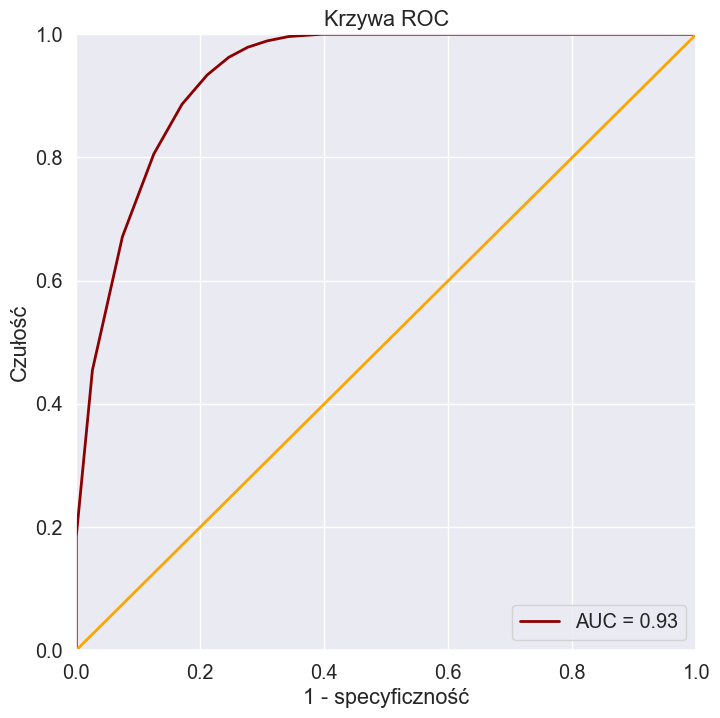

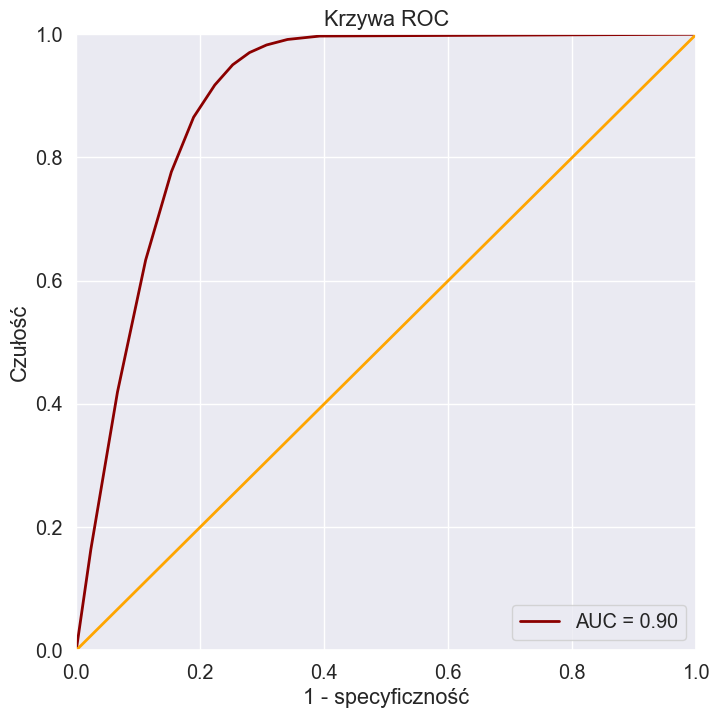

In [27]:
ROC(y_train,y_train_score)
ROC(y_test,y_test_score)


In [28]:
from sklearn.ensemble import RandomForestClassifier
forest1 = RandomForestClassifier(random_state = numery_indeksow, n_jobs = -1, oob_score=True)
forest1.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=303890)

In [29]:
y_train_pred = forest1.predict(X_train)
y_test_pred = forest1.predict(X_test)
display(pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
display(pd.DataFrame(confusion_matrix(y_test, y_test_pred)))

,0,1
0,48962,3584
1,1305,51360


,0,1
0,17752,4768
1,3653,18918


In [30]:
print("uczacy: ", accuracy_score(y_train, y_train_pred))
print("testowy: ", accuracy_score(y_test, y_test_pred))

uczacy:  0.953531474845786
testowy:  0.8132443281364352


In [31]:
hyperparameters = {'max_depth' : range(5,10), 'min_samples_split' : [20, 50, 100]}

In [32]:
forest2 = GridSearchCV(RandomForestClassifier(random_state = numery_indeksow), hyperparameters, n_jobs = -1)
forest2.fit(X_train, y_train)
forest2.best_params_

{'max_depth': 9, 'min_samples_split': 100}

In [33]:
y_train_pred = forest2.predict(X_train)
y_test_pred = forest2.predict(X_test)

In [34]:
print('uczacy : ', accuracy_score(y_train, y_train_pred))
print('testowy: ', accuracy_score(y_test, y_test_pred))

uczacy :  0.8545969527901075
testowy:  0.8558692421991084


In [35]:
y_train_score = forest2.predict_proba(X_train)[:,1]
y_test_score = forest2.predict_proba(X_test)[:,1]

In [36]:
ocen_model_klasyfikacji_binarnej(y_train, y_train_pred)
ocen_model_klasyfikacji_binarnej(y_test, y_test_pred)

Trafność:  0.85
Całkowity współczynnik błędu 0.15
Czułość:  0.94
Wskaźnik fałszywie negatywnych:  0.06
Specyficzność:  0.77
Wskaźnik fałszywie pozytywnych:  0.23
Precyzja:  0.8
Wynik F1:  0.87
Trafność:  0.86
Całkowity współczynnik błędu 0.14
Czułość:  0.94
Wskaźnik fałszywie negatywnych:  0.06
Specyficzność:  0.77
Wskaźnik fałszywie pozytywnych:  0.23
Precyzja:  0.8
Wynik F1:  0.87


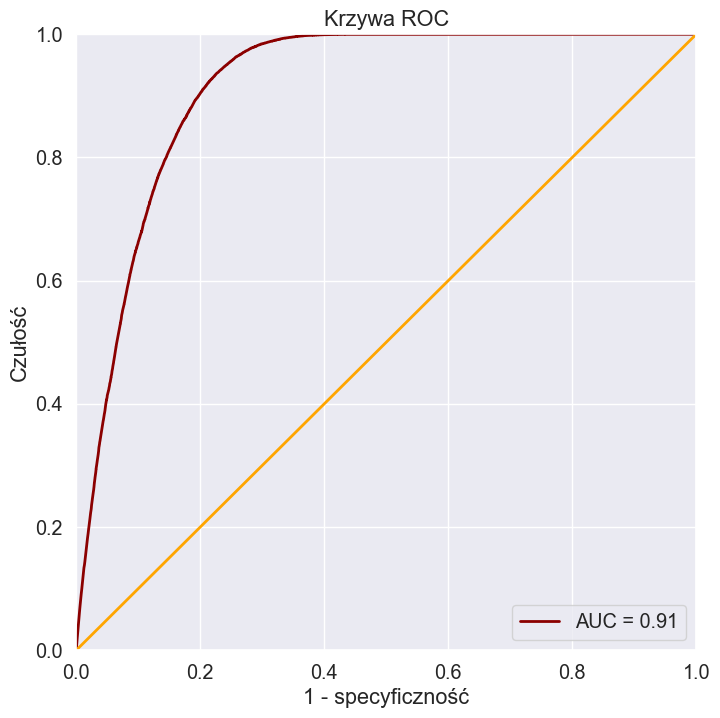

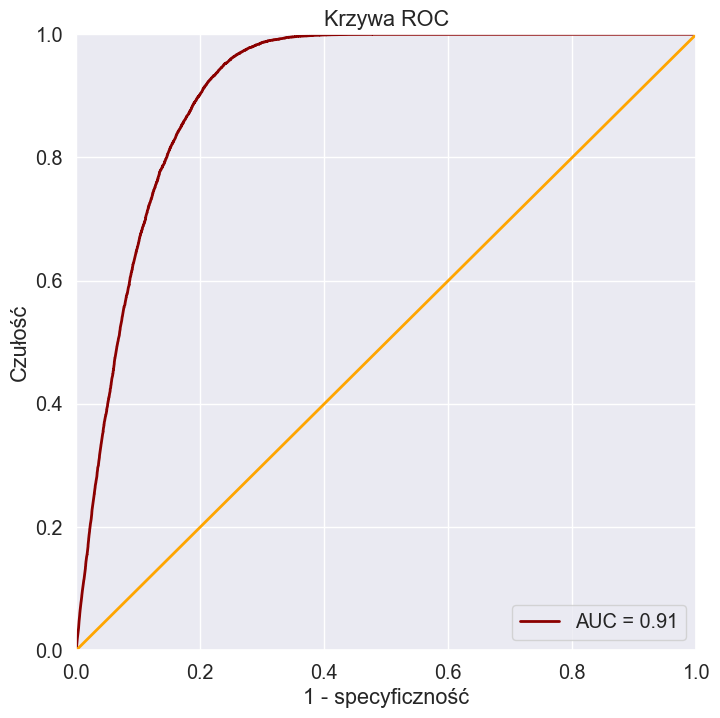

In [37]:
ROC(y_train, y_train_score)
ROC(y_test, y_test_score)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef,auc

def normalization(X):
    return (X - X.mean()) / X.std()


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
pipelines = {
    'KNN': Pipeline([
        ('normalization', FunctionTransformer(normalization)),
        ('model', KNeighborsClassifier())
    ]),
    'RandomForestClassifier': Pipeline([
        ('normalization', FunctionTransformer(normalization)),
        ('model', RandomForestClassifier())
    ])
}

In [40]:
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(name)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1: ', f1_score(y_test, y_pred))
    print('roc_auc: ', roc_auc_score(y_test, y_pred))
    print('\n')

KNN
accuracy:  0.8336696901820763
precision:  0.8023027239539455
recall:  0.886048469274733
f1:  0.8420986146785128
roc_auc:  0.8336103802856791


RandomForestClassifier
accuracy:  0.8131777960125081
precision:  0.7991541552125185
recall:  0.8371804527934075
f1:  0.8177254630431019
roc_auc:  0.8131506171604692


